In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
# Load the prepared data
X = np.load('../data/6hrs/X_6hr.npy')
y = np.load('../data/6hrs/y_6hr.npy')


In [3]:
X.shape

(19752, 48, 52)

In [4]:
y.shape

(19752,)

In [5]:
count_ones = np.sum(y == 1)

count_zeros = np.sum(y == 0)

print(f"Number of 1s: {count_ones}")
print(f"Number of 0s: {count_zeros}")

Number of 1s: 7905
Number of 0s: 11847


In [6]:
X[0].shape

(48, 52)

In [7]:
X[0]

array([[-0.57054595, -0.81909528, -0.85600678, ..., -0.04447006,
        -0.82824677, -0.62655636],
       [-0.57054595, -0.81909528, -0.85600678, ..., -0.04447006,
        -0.82824677, -0.62655636],
       [-0.57054595, -0.81909528, -0.85600678, ..., -0.04447006,
        -0.82824677, -0.62655636],
       ...,
       [-0.57054595,  0.80814734,  1.13763819, ...,  0.05382138,
         1.09951283,  0.1238337 ],
       [-0.57054595,  0.80814734,  1.13763819, ...,  0.04772579,
         1.09951283,  1.73920539],
       [-0.57054595,  0.80814734,  1.13763819, ...,  0.05382138,
         1.09951283,  2.65347374]])

In [8]:
X[0][15]

array([-0.57054595, -0.81909528, -0.85600678, -0.80580948, -0.00663536,
       -0.00801255, -0.00247501, -0.04378329, -0.17437335, -0.14094295,
       -0.86304513, -0.8562083 , -0.00171422, -0.85222277, -0.86244136,
       -0.76983723, -0.85192774, -0.86311731, -0.86323765, -0.84896257,
       -0.82775361, -0.84026428, -0.40478398, -0.86187658, -0.86290237,
       -0.86271939, -0.86294372, -0.52636884, -0.86286557, -0.51820598,
       -0.85399685, -0.83580947, -0.85861559, -0.86298337, -0.86286346,
       -0.72882187, -0.86066902, -0.85894785, -0.86207401, -0.86127118,
       -0.85831261, -0.45699742, -0.81449823, -0.86245966, -0.02695423,
       -0.01925655, -0.86226279, -0.82026648, -0.8594825 , -0.04447006,
       -0.82824677, -0.62655636])

In [9]:
unique_values, counts = np.unique(y, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f'Value {value} occurs {count} times')

Value 0 occurs 11847 times
Value 1 occurs 7905 times


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# Define the model
model = Sequential()

# First LSTM layer with dropout and return sequences for stacking
model.add(LSTM(64, activation='relu', input_shape=(48, 52), return_sequences=True))
  # Dropout for regularization

# Second LSTM layer
model.add(LSTM(64, activation='relu', return_sequences=True))

# Third LSTM layer without return_sequences
model.add(LSTM(32, activation='relu'))

# Fully connected dense layer
model.add(Dense(32, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()





# # Define the model
# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
# model.add(LSTM(50, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# # Save the model
# model.save('lstm_model.h5')

C:\Users\SAIFUL_BADHON\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 48, 64)              │          29,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 48, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,481 (298.75 KB)

 Trainable params: 76,481 (298.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:

# Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Add Early Stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Save the model
# model.save('lstm_model_advanced.h5')



Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6886 - loss: 0.6964 - val_accuracy: 0.7188 - val_loss: 0.6658
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7367 - loss: 0.7132 - val_accuracy: 0.6469 - val_loss: 0.7779
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6862 - loss: 0.6216 - val_accuracy: 0.7301 - val_loss: 0.7097
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7436 - loss: 0.5488 - val_accuracy: 0.7545 - val_loss: 0.5610
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7665 - loss: 0.5153 - val_accuracy: 0.7596 - val_loss: 0.5047
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7782 - loss: 0.4896 - val_accuracy: 0.7779 - val_loss: 0.4931
Epoch 7/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7850 - loss: 0.4784 - val_accuracy: 0.7906 - val_loss: 0.4553
Epoch 8/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7906 - loss: 0.4603 - val_accu

In [13]:
# Step 3: Evaluate the model
from sklearn.metrics import precision_score,recall_score,f1_score

y_pred_proba = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Precision: 0.65
Recall: 0.13
F1 Score: 0.22


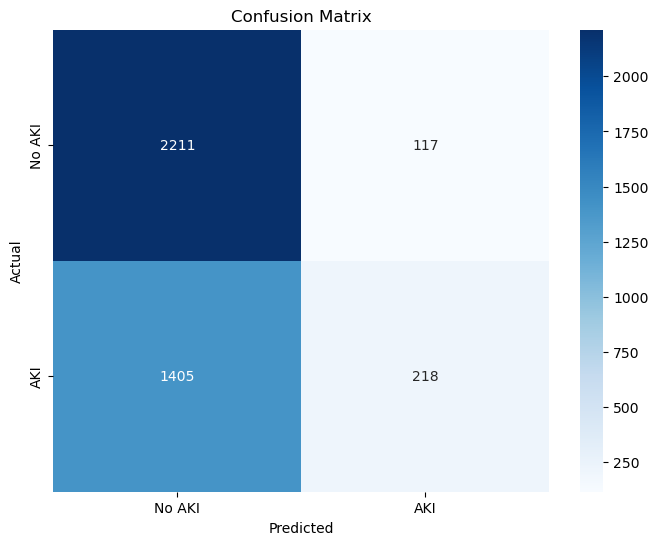

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AKI', 'AKI'], yticklabels=['No AKI', 'AKI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

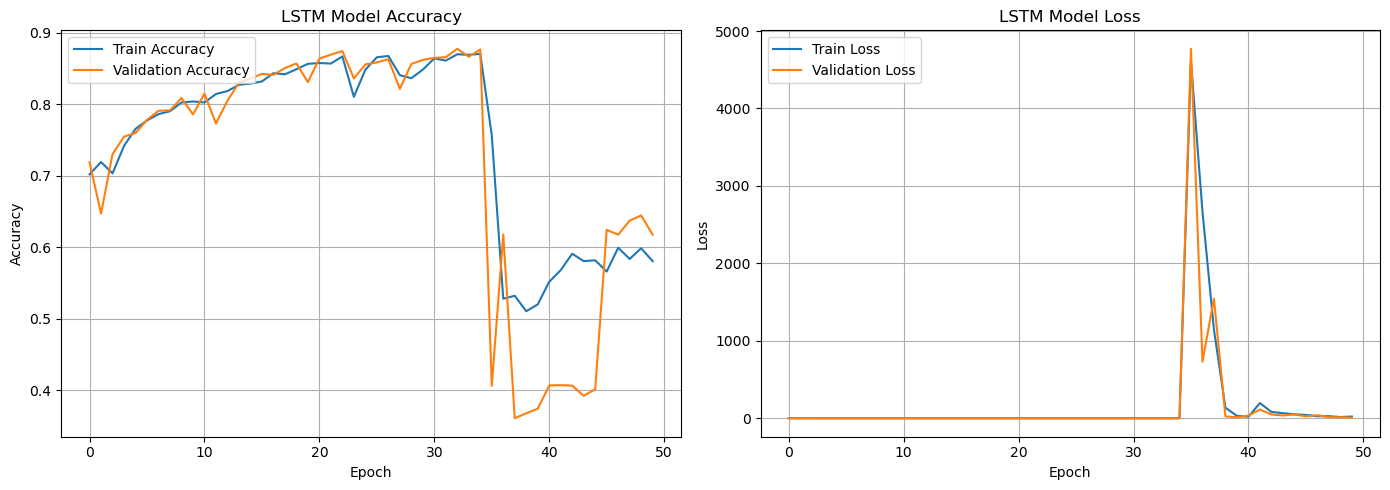

In [15]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()


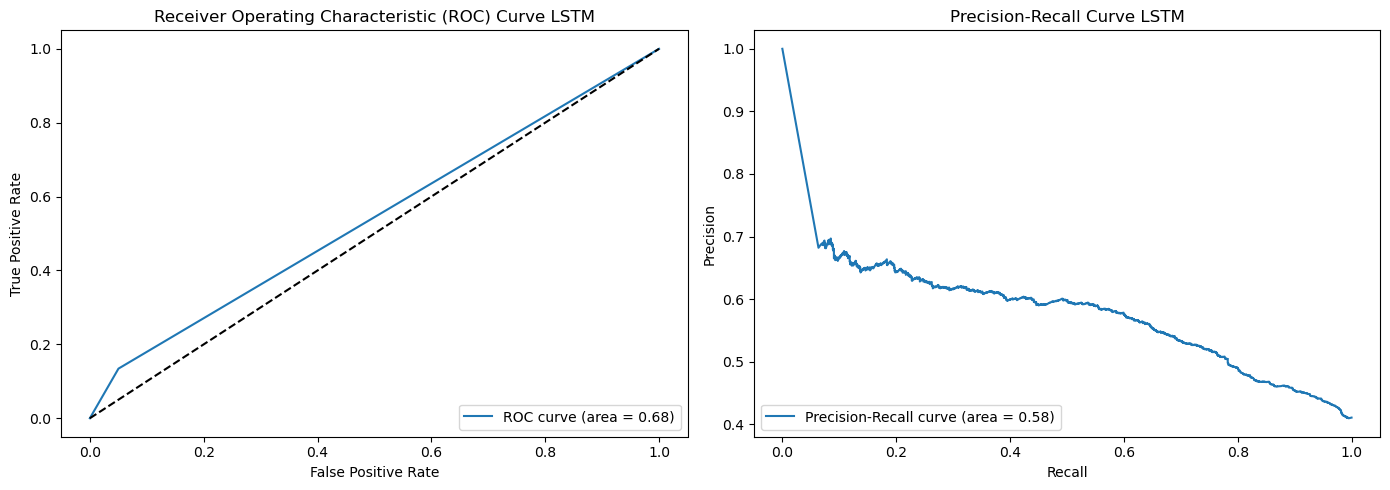

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Assuming y_true are the true labels and y_scores are the predicted probabilities

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred_proba)

# Calculate Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % auprc)
plt.title('Precision-Recall Curve LSTM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()
